<a href="https://colab.research.google.com/github/MichaelXiongZJ/CSE144/blob/main/Review%20Material%3A%20Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda
- Intro to Jupyter Notebooks
- Intro to Machine Learning
- Data Preprocessing and Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression

# Introduction
## What is Machine Learning?
- Machine Learning is the ability for computers to learn without being explicitly programmed
- ie. some program that learns from data fed into it





## Components of ML Algorithm
### Representation
- Given a dataset and a problem, what learning framework should be used?
- eg. Decision trees, SVM, DNN

### Evaluation
- How the model interprets its success?
- ML models need a metric to learn (loss/cost function)

### Optimization
- train model iteratively that results in a max/min function evalutation
- eg. Greedy search, gradient descent, linear programming


## Types of Learning
### Supervised
- training data is labeled

### Unsupervised
- training data is not labeled

### Semi-supervised
- some data is labeled and some is not labeled

### Reinforcement
- rewarding good actions or penalizing bad actions



## Types of Models
### Discriminative
- learns based on conditional probability P(Y|X)
- models seek to determine a decision boundary between classes

### Generative
- learns based on joint probability P(X,Y)
- models aim to determine the distribution of the classes and
are focused more on the way data is generated


# Data Preprocessing and Feature Engineering
- Before we can train a ML model we need to prepare data
- **Features** are the inputs associated with each data point being fed into the
model
- **Labels** are the outputs associated with each data point

In [ ]:
# load data (https://developers.google.com/machine-learning/crash-course/california-housing-data-description)
df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# median_house_value is label
# everything else are features
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


## Data Spliting
- split data into training subset and testing subset
- training set consists of the data the model will use to learn
- testing set consists of the data used for final evaluation
- validation set consists of data model will use to tweak its parameters

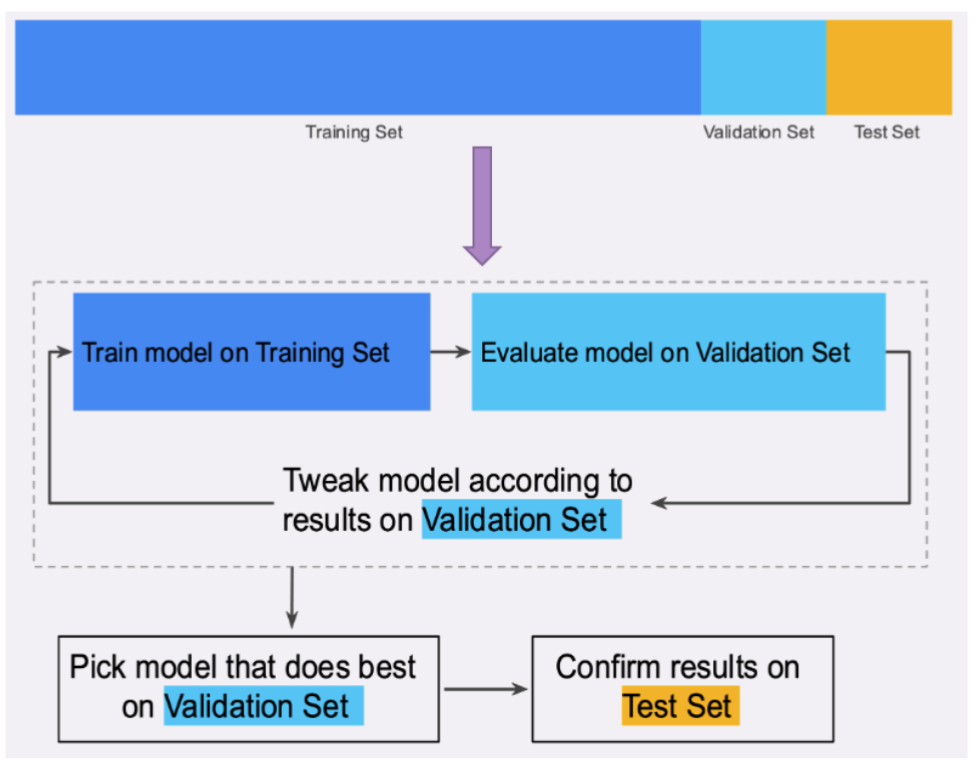

## Feature Engineering
- not all data are numerical some are categorical (eg. strings) so we need to somehow preprocess that data so the model can read it

### One-hot encoding
- 1 way to encode categorical data
- preserves data without introducing additional bias

In [ ]:
# creating toy dataset
x, y = make_regression(n_samples=5, n_features=2, noise=1, random_state=42)
# feature 2 will be our categorical data
f2 = np.random.choice(['dog', 'cat', 'fish'], size=x.shape[0], replace=True)
cols = [f'f{i}' for i in range(2)] + ['label']
df = pd.DataFrame(data=np.hstack((x, np.expand_dims(y, axis=1))), columns=cols,)
df.insert(2, 'f2', f2)
df

,f0,f1,f2,label
0,0.496714,-0.138264,cat,6.737636
1,0.647689,1.523030,cat,37.796369
2,-0.234153,-0.234137,fish,-10.276588
3,-0.469474,0.542560,fish,0.401748
4,1.579213,0.767435,fish,42.226843


In [ ]:
# doing one-hot encoding
df = pd.get_dummies(df, columns=['f2'])
df

,f0,f1,label,f2_cat,f2_fish
0,0.496714,-0.138264,6.737636,1,0
1,0.647689,1.523030,37.796369,1,0
2,-0.234153,-0.234137,-10.276588,0,1
3,-0.469474,0.542560,0.401748,0,1
4,1.579213,0.767435,42.226843,0,1


In [ ]:
# completly unnecessary, just cleaning up the df
df.join( df.pop('label') )

,f0,f1,f2_cat,f2_fish,label
0,0.496714,-0.138264,1,0,6.737636
1,0.647689,1.523030,1,0,37.796369
2,-0.234153,-0.234137,0,1,-10.276588
3,-0.469474,0.542560,0,1,0.401748
4,1.579213,0.767435,0,1,42.226843


## Handling Outliers
- having extreme outliers in the data can cause the machine learning model to
be mislead during training, so its important to remove them



In [ ]:
# removing outliers via clipping (clamping dataset between a min and max value)

max_val = 0.3
df['f0'].where(df['f0'] <= max_val, max_val, inplace=True)
df

,f0,f1,f2_cat,f2_fish
0,0.300000,-0.138264,1,0
1,0.300000,1.523030,1,0
2,-0.234153,-0.234137,0,1
3,-0.469474,0.542560,0,1
4,0.300000,0.767435,0,1


## Binning
- process of grouping features into clusters in order to better
control the data distribution


In [ ]:
# creating toy dataset
age = [10, 15, 16, 18, 20, 30, 35, 42, 48, 50, 52, 55]
age_df = pd.DataFrame(data=age, columns=['age'])
age_df

,age
0,10
1,15
2,16
3,18
4,20
5,30
6,35
7,42
8,48
9,50


In [ ]:
# doing binning

def categorize(a):
    if 10 <= a <= 21:
        return '[10,21]'
    elif 22 <= a <= 33:
        return '[22,33]'
    elif 34 <= a <= 45:
        return '[34,45]'
    # elif 46 <= a <= 55:
    return '[46,55]'

bins = [categorize(a) for a in age]
age_df.insert(1, 'age_bins', bins)
age_df

,age,age_bins
0,10,"[10,21]"
1,15,"[10,21]"
2,16,"[10,21]"
3,18,"[10,21]"
4,20,"[10,21]"
5,30,"[22,33]"
6,35,"[34,45]"
7,42,"[34,45]"
8,48,"[46,55]"
9,50,"[46,55]"


In [ ]:
# then one-hot encode
pd.get_dummies(age_df, columns=['age_bins'])

,age,"age_bins_[10,21]","age_bins_[22,33]","age_bins_[34,45]","age_bins_[46,55]"
0,10,1,0,0,0
1,15,1,0,0,0
2,16,1,0,0,0
3,18,1,0,0,0
4,20,1,0,0,0
5,30,0,1,0,0
6,35,0,0,1,0
7,42,0,0,1,0
8,48,0,0,0,1
9,50,0,0,0,1
